In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# from google.colab import drive
# drive.mount('/content/drive')

KeyboardInterrupt: 

In [6]:
df=pd.read_excel('C:\Users\gvinaykumar\OneDrive - DXC Production\Documents\5. DS_ML\6. Machine Learning\MachineLearningTopics\datasets\LoanPurchasing.xlsx')
df.drop(['ZIP Code','ID'],axis=1,inplace=True)

In [7]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [8]:
df.isnull().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [9]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

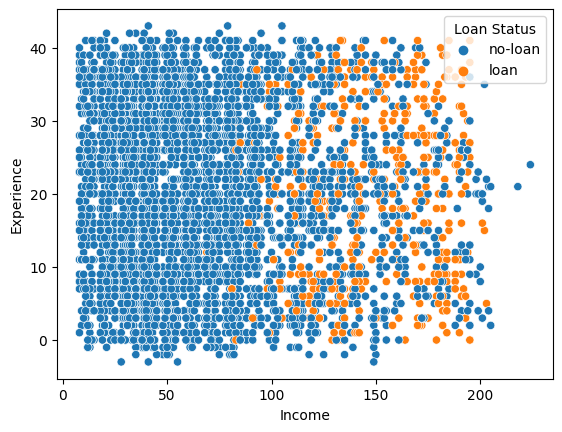

In [10]:
scatter=sns.scatterplot(data=df,x='Income',y='Experience',hue='Personal Loan')
scatter.legend_.set_title('Loan Status')
new_labels = ['no-loan', 'loan']
for t, l in zip(scatter.legend_.texts, new_labels):
    t.set_text(l)

In [11]:
cross_tab= pd.crosstab(df['CreditCard'],df['Personal Loan'])
cross_tab

Personal Loan,0,1
CreditCard,,
0,3193,337
1,1327,143


In [ ]:
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


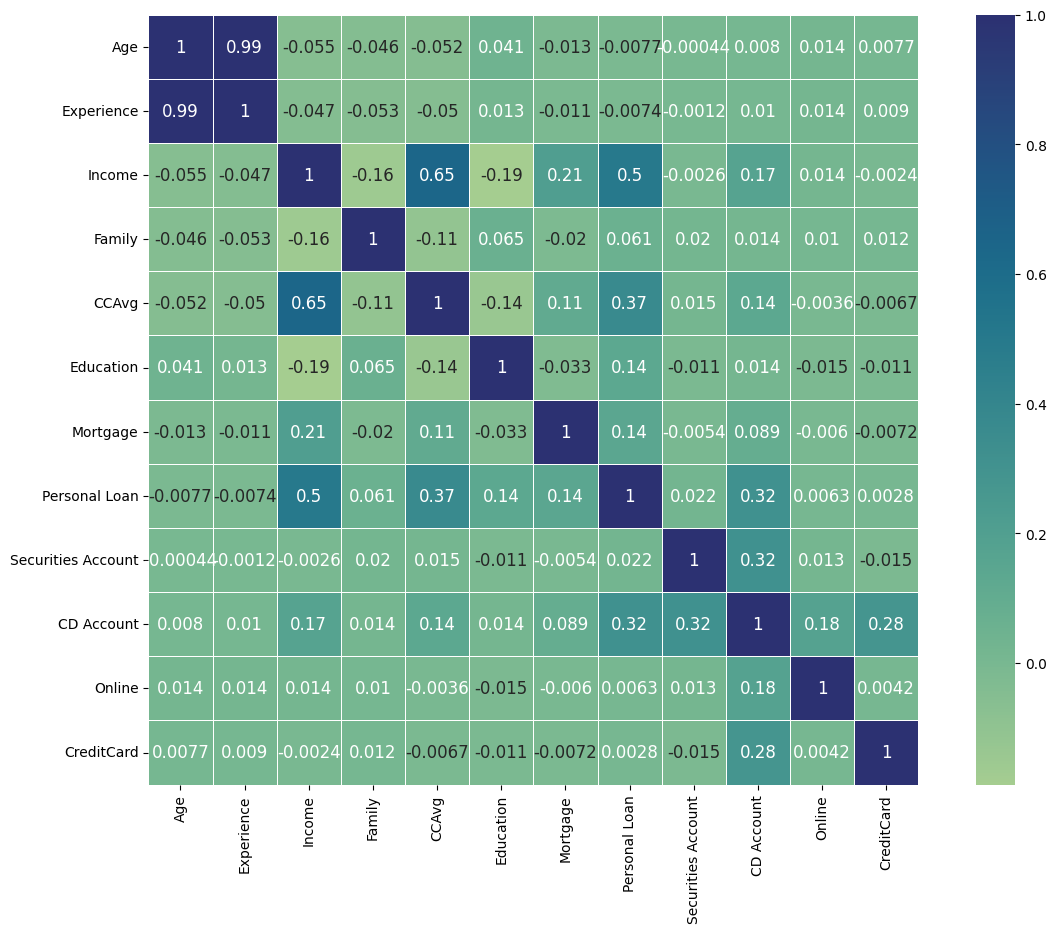

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, annot_kws={"size": 12}, linewidths=0.5, cmap='crest', square=True)
plt.yticks(rotation=0)
plt.show()

In [14]:
features=df.columns.to_list()
len(features)

12

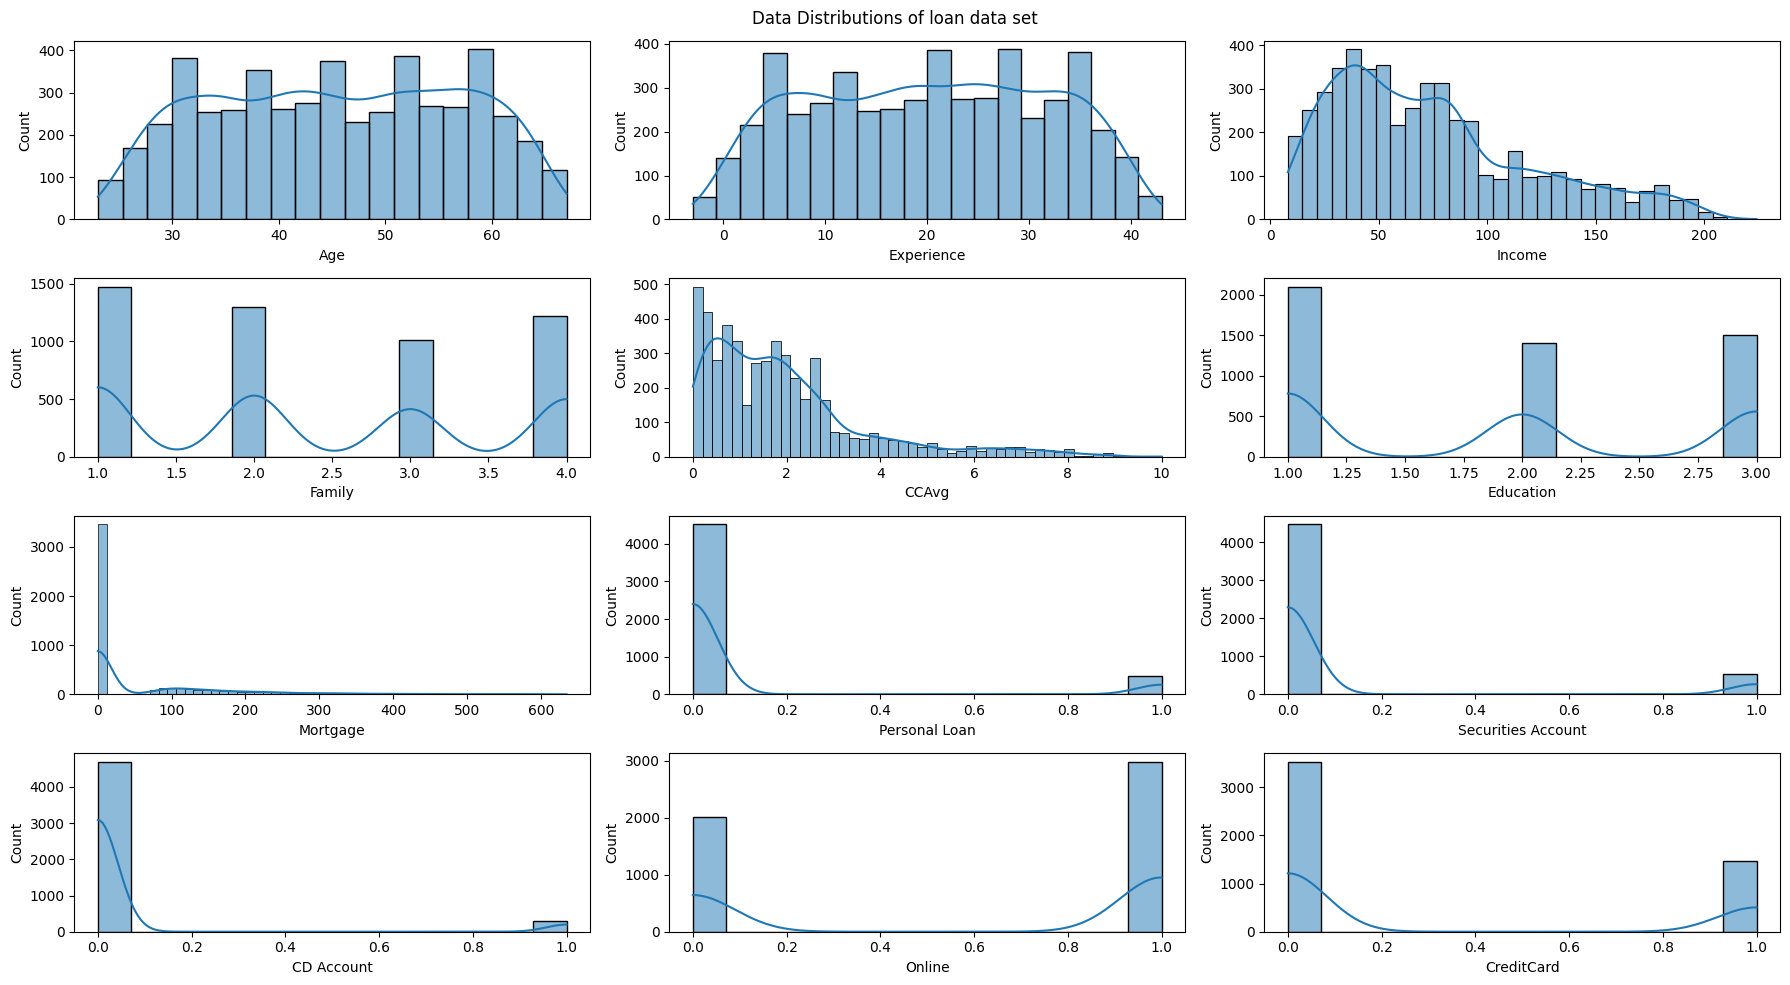

In [28]:
fig,axes=plt.subplots(4,3,figsize=(18,10))
fig.suptitle("Data Distributions of loan data set")
# sns.histplot(ax=axes[0,0],data=df,x='Age',kde=True)
for i, ax in enumerate(axes.flat):
  if i < len(features):
    sns.histplot(df.iloc[:,i],ax=ax,kde=True)
  else:
    ax.axis('off')
# sns.pairplot(df[features])
plt.tight_layout()
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [18]:
x = df.drop(['Personal Loan'],axis=1)
y=  df['Personal Loan']
x_train, X_test,y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)
log_model = LogisticRegression()
log_model.fit(x_train,y_train)
predictions = log_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1502
           1       0.79      0.57      0.66       148

    accuracy                           0.95      1650
   macro avg       0.87      0.78      0.82      1650
weighted avg       0.94      0.95      0.94      1650



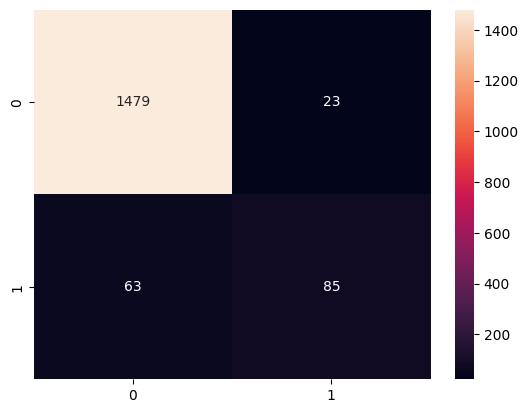

In [26]:
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,fmt=".0f")
plt.show()

In [27]:
print(accuracy_score(y_test,predictions))

0.9478787878787879


array([0, 0, 0, ..., 1, 0, 0])